

<center> 

<img src="https://cdn.discordapp.com/attachments/697907812524884021/1067806766995349574/logoIsel.png" width="550" height="400">

# Engenharia Informática e Multimédia 

##  Aprendizagem Automática 
##  2022/2023 



###  Classificação de Críticas de Cinema do IMDb
###  Docente: Engenheiro Gonçalo Marques

### Trabalho Realizado por: António Luís Ferreira 47500 e Tomás Gomes 48614
</center>

# <center> Objetivos do Trabalho 

#### Este trabalho tem como objetivo, a partir de uma base de dados dada pelo docente, nomeadamente a base de dados de Críticas de cinema do IMDB, determinar se uma critica é positiva ou negativa, no caso binário, e determinar o seu rating de 1-4 e 7-10, no caso multiclasse.

#### Este pickle é um dicionario com dois campos, "data", com a lista de textos de crítica e o campo "target", representante da sua pontuação crítica.

#### De maneira a que o código ficasse melhor organizado, cada classificador foi analisado, implementado e testado no seu respetivo ficheiro júpiter, pelo que neste ficheiro irão estar presentes os gráficos dos resultados para uma melhor comparação.
</center>

### Imports

In [1]:
import pandas
import pickle
import re
import sklearn
import time

import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

from scripts import *
from plotMatriz import plotMatriz

#Auxiliares de análise
from sklearn.metrics import precision_recall_curve, confusion_matrix, roc_curve
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

#TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer


#Logistic Regression
from sklearn.linear_model import LogisticRegression

#Random Forest
from sklearn.ensemble import RandomForestClassifier

#K-Neighbors
from sklearn.neighbors import KNeighborsClassifier

#SVC
from sklearn.svm import LinearSVC

#cluster
from sklearn.cluster import MiniBatchKMeans

#PCA
from sklearn.decomposition import TruncatedSVD

#Pandas
import pandas as pd

In [2]:
stemmed_data_path = 'Dados/stemsnowball.p'

final_tfidf_bin     = 'tfidf/tfidf_binario.p'

final_tfidf_multi    = 'tfidf/tfidf_multiclasse.p' 

### <center> Funções pedidas no enunciado e auxiliares </center>
#### Mais uma vez, de modo a que o código tivesse melhor organizado, as funções pedidas pelo docente no enunciado estão presentes no ficheiro python "scripts.py", sendo elas nomeadamente: 

<dl>
    <li>OpenFile() - Recebe o nome do ficheiro pickle e abre-o</li>
    <li>clearText() - Recebe as críticas e limpa-as de maneira a que as tags sejam removidas e apenas sobrem caracteres alfabéticos sem acentos</li>
    <li>text2vector() - Recebe o documento que vai vectorizar, juntamente com o tipo de classificação, nomeadamente binário ou multiclasse e a diretoria do ficheiro</li>
    <li>loadModels() - Recebe uma diretoria e consoante o classificador desejado faz o seu respetivo</li>
    <li>binClassify() - Recebe a "data" ou seja, o texto vectorizado e estima os respetivos "targets" consoante o classificador desejado (classificadores binários)</li>
    <li>multiClassify() - O mesmo que o binClassify mas para classificadores multiclasse</li>
</dl>

Nos ficheiros jupyter de cada classificador, são utilizadas as funções pedidas de modo a comprovar o seu bom funcionamento.

In [3]:
D = openFile(stemmed_data_path)

Docs = D['Docs']
y    = D['y']

## <center> Comparações de modelos - CASO BINÁRIO</center>

- Para a escolha dos melhores parâmetros, primeiramente foram testados vários min_df, n_gramas e token_patterns na função de vetorizar o texto antes da criação dos modelos de classificação.

- Após a análise de todas as combinações ponderadas, foram escolhidos assim estes parâmetros e vetorizado o texto. Estes testes foram apenas conduzidos no classificador Logistic Regression.

- De seguida, para cada classificador, foram testados vários hyper parametros para assim analisar a sua performance e escolher o que originava melhores resultados de classificação.

- Por fim, foram utilizados esses hyper parâmetros ótimos para criar o modelo de classificação e foi posteriormente testado com dados de validação e teste.

In [4]:
yB = y.copy()
yB[yB<5] = 0
yB[yB>6] = 1

In [5]:
Docs1_b, Docs2_b, y1_b, y2_b     = train_test_split(Docs, yB, test_size=1/4, stratify=yB, random_state=42)
Docs1t_b, Docs1v_b, y1t_b, y1v_b = train_test_split(Docs1_b, y1_b, test_size=1/3, stratify=y1_b, random_state=42)

tfidf_b = openFile(final_tfidf_bin)['tfidf']

X1t_b = text2vector(Docs1t_b, "b", final_tfidf_bin)
X1v_b = text2vector(Docs1v_b, "b", final_tfidf_bin)
X2_b  = text2vector(Docs2_b, "b",  final_tfidf_bin)

In [6]:
direct_lrBIN  = 'Modelos/lr_model_bin.p'
direct_lsvcBIN = 'Modelos/svc_model_bin.p'
direct_knnBIN  = 'Modelos/knn_model_bin.p'
direct_rfcBIN  = 'Modelos/trees_model_bin.p'

In [7]:
lr_b   = loadModels('logReg',direct_lrBIN)
lsvc_b = loadModels('SVC',direct_lsvcBIN)
knn_b  = loadModels('knn',direct_knnBIN)
rfc_b  = loadModels('trees',direct_rfcBIN)

In [8]:
print("Logistic Regression:")
print('Score Treino:',    lr_b.score(X1t_b, y1t_b)*100)
print('Score Validação:', lr_b.score(X1v_b, y1v_b)*100)
print('Score Teste:',     lr_b.score(X2_b, y2_b)*100, '\n')

print("Linear SVC:")
print('Score Treino:',    lsvc_b.score(X1t_b, y1t_b)*100)
print('Score Validação:', lsvc_b.score(X1v_b, y1v_b)*100)
print('Score Teste:',     lsvc_b.score(X2_b, y2_b)*100, '\n')

print("K-Neighbours:")
print('Score Treino:', knn_b.score(X1t_b, y1t_b)*100)
print('Score Validação:', knn_b.score(X1v_b, y1v_b)*100)
print('Score Teste:', knn_b.score(X2_b, y2_b)*100, '\n')

print("Random Forest Classifier:")
print('Score Treino:', rfc_b.score(X1t_b, y1t_b)*100)
print('Score Validação:', rfc_b.score(X1v_b, y1v_b)*100)
print('Score Teste:', rfc_b.score(X2_b, y2_b)*100, '\n')

values_v = [lr_b.score(X1v_b, y1v_b)*100,lsvc_b.score(X1v_b, y1v_b)*100,knn_b.score(X1v_b, y1v_b)*100,rfc_b.score(X1v_b, y1v_b)*100]
values_t = [lr_b.score(X2_b, y2_b)*100,lsvc_b.score(X2_b, y2_b)*100,knn_b.score(X2_b, y2_b)*100,rfc_b.score(X2_b, y2_b)*100]


Logistic Regression:
Score Treino: 98.86399999999999
Score Validação: 90.8
Score Teste: 90.928 

Linear SVC:
Score Treino: 99.94800000000001
Score Validação: 91.03999999999999
Score Teste: 91.34400000000001 

K-Neighbours:
Score Treino: 100.0
Score Validação: 79.192
Score Teste: 78.792 

Random Forest Classifier:
Score Treino: 100.0
Score Validação: 86.11999999999999
Score Teste: 86.08 



In [9]:
erros_v = []
erros_t = []

In [10]:
def plot_CM(MC,MCV,title):
    plt.figure(figsize=(16,8))
    plt.suptitle(title, fontsize=28)
    plt.subplot(121)
    plotMatriz(MCV, title="Dados de Validação")
    plt.subplot(122)
    plotMatriz(MC, title="Dados de Teste")

Número de Erros Validação Logistic Regression:  1150
Número de Erros Teste Logistic Regression:  1134


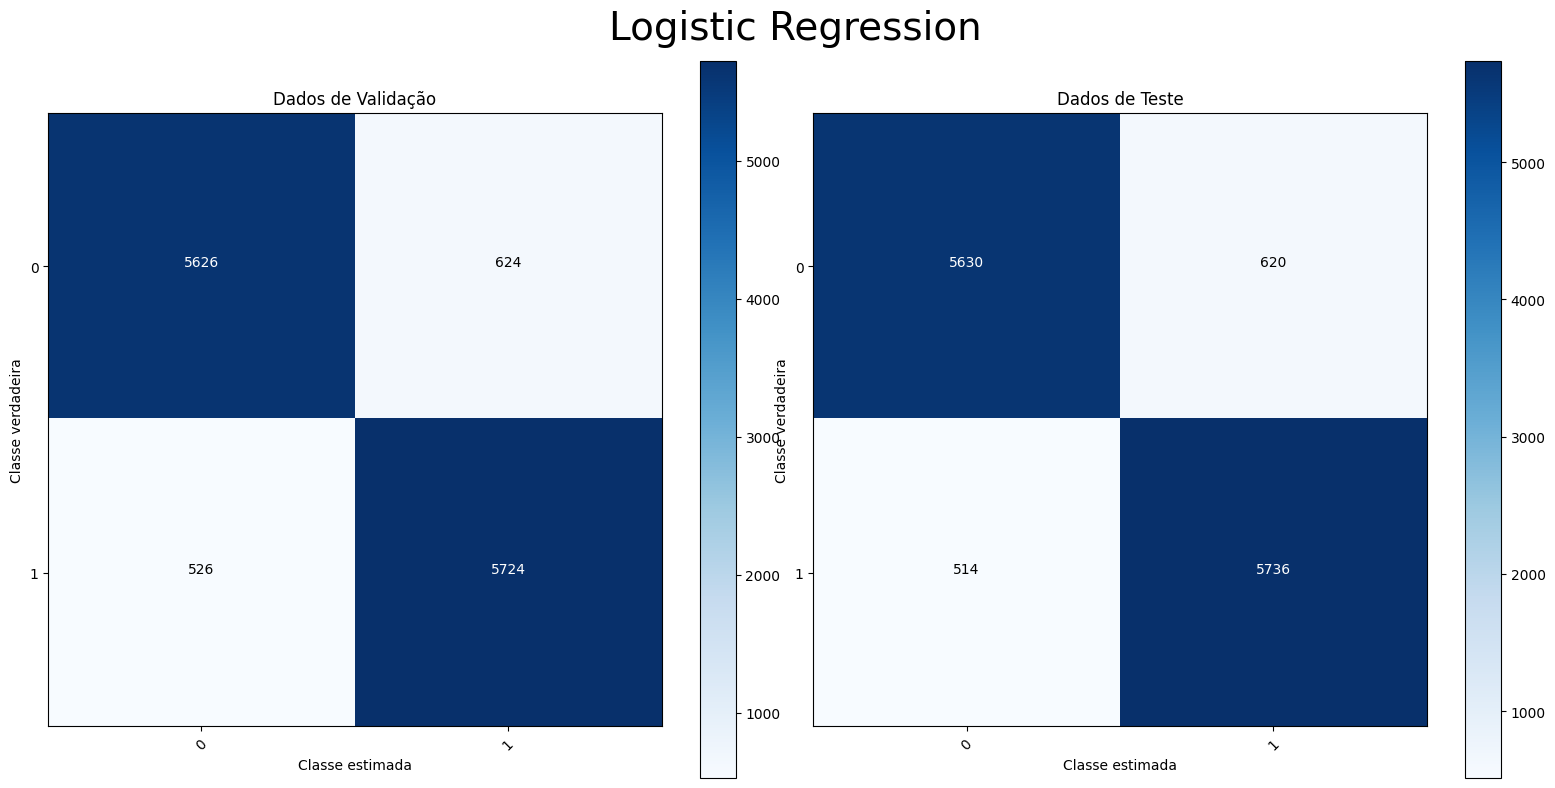

In [11]:
y2e_lr = binClassify(X2_b, 'logReg', False, direct_lrBIN)
y1v_lr = binClassify(X1v_b, 'logReg', False, direct_lrBIN)

print('Número de Erros Validação Logistic Regression: ', np.sum(y1v_b != y1v_lr))
print('Número de Erros Teste Logistic Regression: ', np.sum(y2_b != y2e_lr))

erros_v.append(np.sum(y1v_b != y1v_lr))
erros_t.append(np.sum(y2_b != y2e_lr))

MC = confusion_matrix(y2_b, y2e_lr)
MCV = confusion_matrix(y1v_b, y1v_lr)

plot_CM(MC,MCV,"Logistic Regression")

Número de Erros Validação Linear SVC:  1120
Número de Erros Teste Linear SVC:  1082


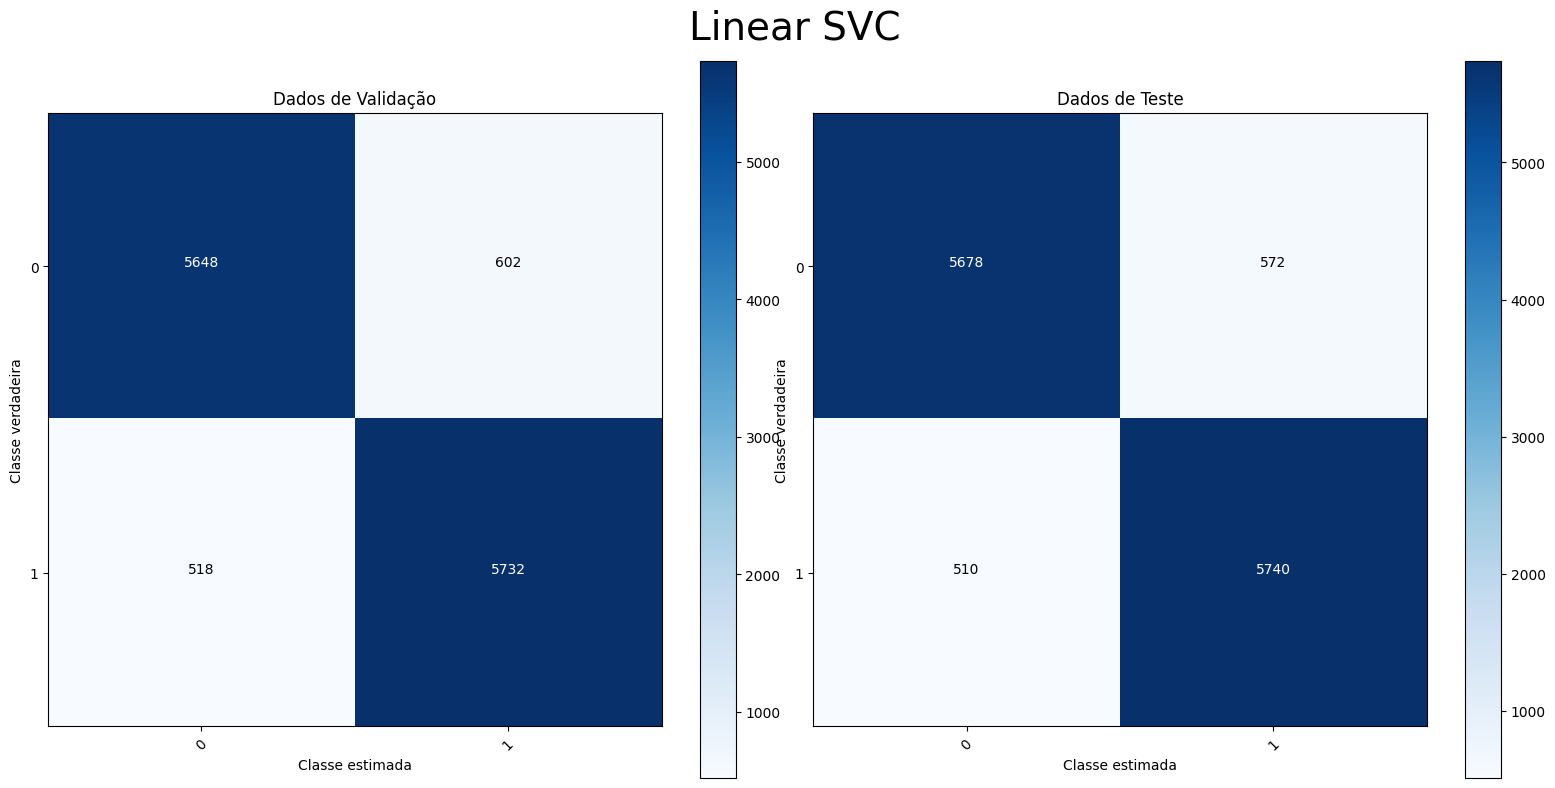

In [12]:
y2e_lsvc = binClassify(X2_b, 'SVC', False, direct_lsvcBIN)
y1v_lsvc = binClassify(X1v_b, 'SVC', False, direct_lsvcBIN)

print('Número de Erros Validação Linear SVC: ', np.sum(y1v_b != y1v_lsvc))
print('Número de Erros Teste Linear SVC: ', np.sum(y2_b != y2e_lsvc))

erros_v.append(np.sum(y1v_b != y1v_lsvc))
erros_t.append(np.sum(y2_b != y2e_lsvc))

MC = confusion_matrix(y2_b, y2e_lsvc)
MCV = confusion_matrix(y1v_b, y1v_lsvc)

plot_CM(MC,MCV,"Linear SVC")

Número de Erros Validação K_Neighbours:  2601
Número de Erros Teste K_Neighbours:  2651


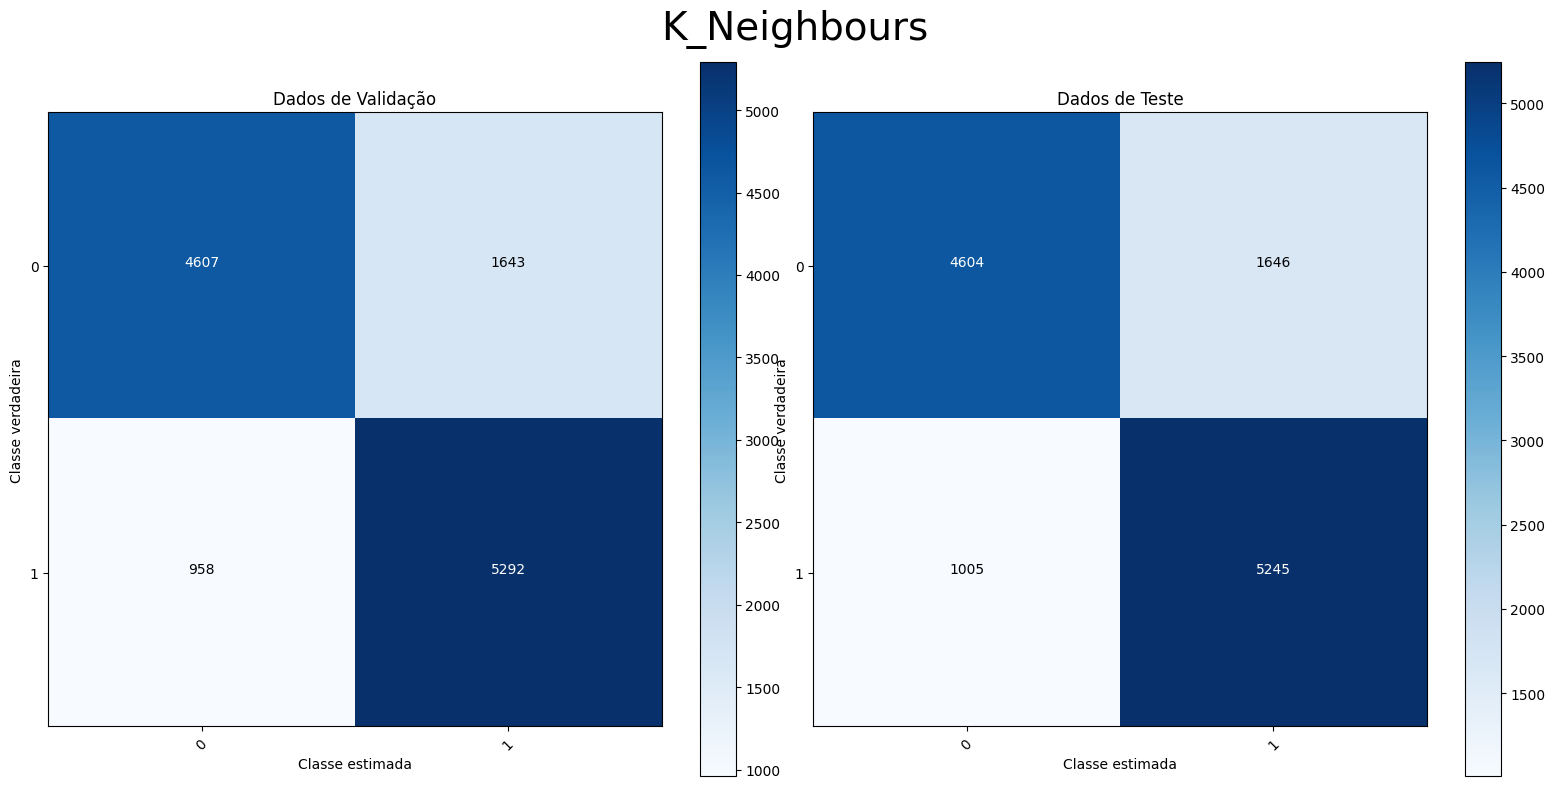

In [13]:
y2e_knn = binClassify(X2_b, 'knn', False, direct_knnBIN)
y1v_knn = binClassify(X1v_b, 'knn', False, direct_knnBIN)

print('Número de Erros Validação K_Neighbours: ', np.sum(y1v_b != y1v_knn))
print('Número de Erros Teste K_Neighbours: ', np.sum(y2_b != y2e_knn))

erros_v.append(np.sum(y1v_b != y1v_knn))
erros_t.append(np.sum(y2_b != y2e_knn))

MC = confusion_matrix(y2_b, y2e_knn)
MCV = confusion_matrix(y1v_b, y1v_knn)

plot_CM(MC,MCV,"K_Neighbours")

Número de Erros Validação Random Forest Classifier:  1735
Número de Erros Teste Random Forest Classifier:  1740


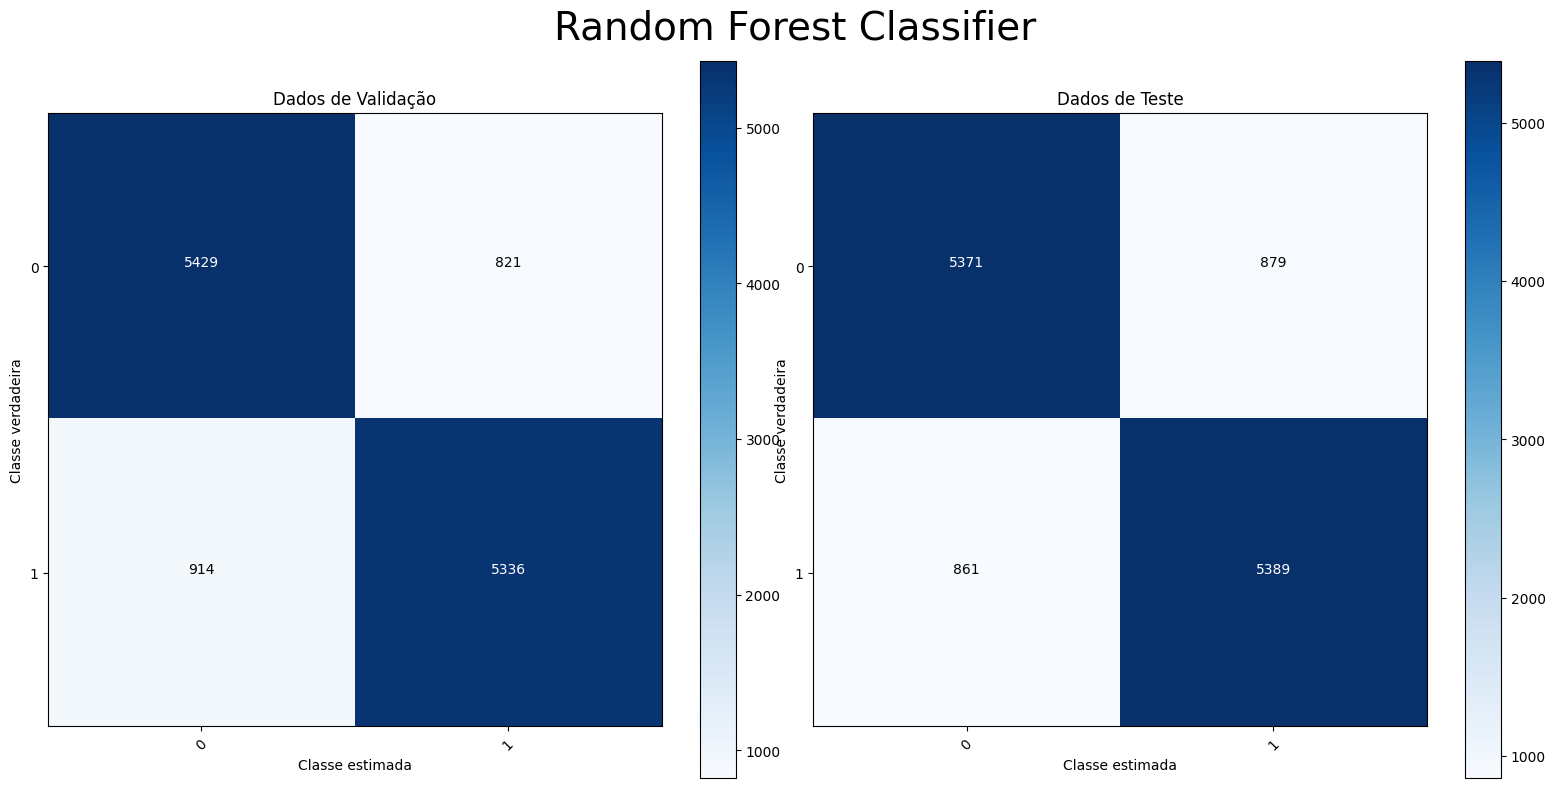

In [14]:
y2e_rfc = binClassify(X2_b, 'trees', False, direct_rfcBIN)
y1v_rfc = binClassify(X1v_b, 'trees', False, direct_rfcBIN)

print('Número de Erros Validação Random Forest Classifier: ', np.sum(y1v_b != y1v_rfc))
print('Número de Erros Teste Random Forest Classifier: ', np.sum(y2_b != y2e_rfc))

erros_v.append(np.sum(y1v_b != y1v_rfc))
erros_t.append(np.sum(y2_b != y2e_rfc))

MC = confusion_matrix(y2_b, y2e_rfc)
MCV = confusion_matrix(y1v_b, y1v_rfc)

plot_CM(MC,MCV,"Random Forest Classifier")

<center>

| Classificador | Parâmetros | Score Treino (%) | Score Val. (%) | Score Teste (%) | Erros Val. | Erros Teste |
| --- | --- | --- | --- | --- | --- | --- |
| **Logistic Regression** | p = l2, C = 4.5 | 98.86 | 90.8 | 90.93 | 1150 | 1134 |
| **Linear SVC** | p = l2, C = 1 | 99.95 | 91.04 | 91.34 | 1120 | 1082 |
| **K-Neighbors Classifier** | k = 45, w=distance | 100 | 79.19 | 78.79 | 2601 | 2651 |
| **Random Forest Classifier** | components=200 | 100 | 86.12 | 86.08 | 1735 | 1740 |

</center>


In [15]:
def graphs():
    # creating the dataset
    models = ['Logistic_R', 'L_SVC', 'KNN', 'RFC']

    barwidth = 0.4

    colors = ['blue', 'orange', 'violet', 'red']

    def addlabels(x,y):
        for i in range(len(x)):
            plt.text(i, y[i]//2, y[i], ha = 'center')

    plt.figure(figsize=(24,14))


    plt.subplot(221)
    [plt.bar(models[i], values_v[i], color=colors[i], width=barwidth) for i in range(4)]
    addlabels(models, values_v)
    plt.legend((models))
    plt.xlabel("Classificadores")
    plt.ylabel("Score")
    plt.title("Scores Validação")

    plt.grid(linestyle="-.", alpha=0.4)
    plt.subplot(222)
    # creating the bar plot
    [plt.bar(models[i], values_t[i], color=colors[i], width=barwidth) for i in range(4)]
    addlabels(models, values_t)
    plt.legend((models))
    plt.xlabel("Classificadores")
    plt.ylabel("Score")
    plt.title("Scores Teste")

    plt.grid(linestyle="-.", alpha=0.4)
    plt.subplot(223)
    # creating the bar plot
    [plt.bar(models[i], erros_v[i], color=colors[i], width=barwidth) for i in range(4)]
    addlabels(models, erros_v)
    plt.legend((models))
    plt.xlabel("Classificadores")
    plt.ylabel("Erros")
    plt.title("Erros Validação")

    plt.grid(linestyle="-.", alpha=0.4)
    plt.subplot(224)
    # creating the bar plot
    [plt.bar(models[i], erros_t[i], color=colors[i], width=barwidth) for i in range(4)]
    addlabels(models, erros_t)
    plt.legend((models))
    plt.xlabel("Classificadores")
    plt.ylabel("Erros")
    plt.title("Erros Teste")
    plt.grid(linestyle="-.", alpha=0.4)


    plt.show()

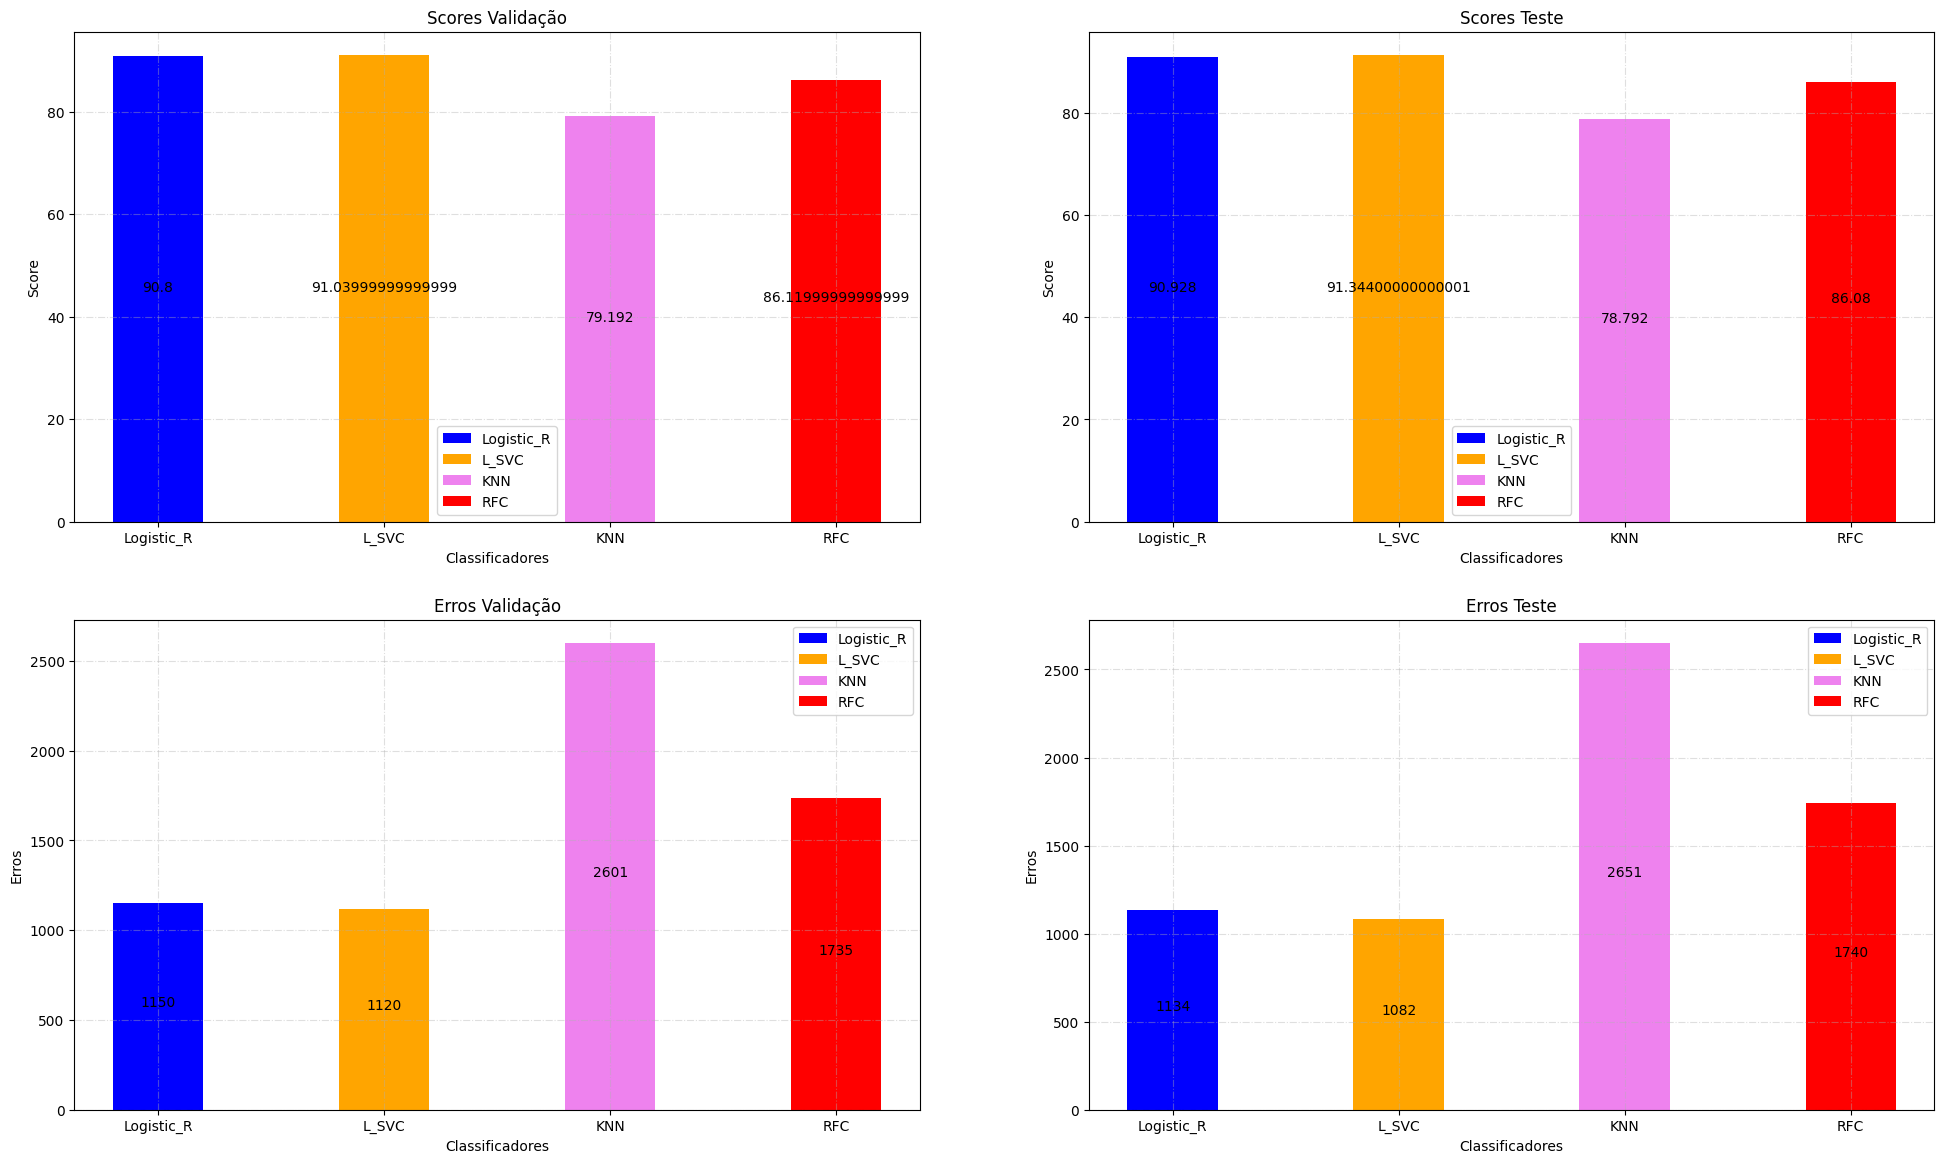

In [16]:
graphs()

## <center> Comparações de modelos - CASO Multiclasse</center>

- Para a escolha dos melhores parâmetros, primeiramente foram testados vários min_df, n_gramas e token_patterns na função de vetorizar o texto antes da criação dos modelos de classificação.

- Após a análise de todas as combinações ponderadas, foram escolhidos assim estes parâmetros e vetorizado o texto. Estes testes foram apenas conduzidos no classificador Logistic Regression.

- De seguida, para cada classificador, foram testados vários hyper parametros para assim analisar a sua performance e escolher o que originava melhores resultados de classificação.

- Por fim, foram utilizados esses hyper parâmetros ótimos para criar o modelo de classificação e foi posteriormente testado com dados de validação e teste.

In [17]:
D = openFile(stemmed_data_path)

Docs = D['Docs']
y = D['y']

yM = y.copy()
erros_v = []
erros_t = []

In [18]:
Docs1_m, Docs2_m, y1_m, y2_m     = train_test_split(Docs, yM, test_size=1/4, stratify=yM,random_state=42) 
Docs1t_m, Docs1v_m, y1t_m, y1v_m = train_test_split(Docs1_m, y1_m, test_size=1/3, stratify=y1_m,random_state=42)  

tfidf_m = openFile(final_tfidf_multi)['tfidf']

X1t_m = text2vector(Docs1t_m, "m", final_tfidf_multi)
X1v_m = text2vector(Docs1v_m, "m", final_tfidf_multi)
X2_m  = text2vector(Docs2_m, "m",  final_tfidf_multi)

In [19]:
direct_lrMULTI   = 'Modelos/lr_model_multi.p'
direct_lsvcMULTI = 'Modelos/svc_model_multi.p'
direct_knnMULTI  = 'Modelos/knn_model_multi.p'
direct_rfcMULTI  = 'Modelos/trees_model_multi.p'

In [20]:
lr_m   = loadModels('logReg',direct_lrMULTI)
lsvc_m = loadModels('SVC',direct_lsvcMULTI)
knn_m  = loadModels('knn',direct_knnMULTI)
rfc_m  = loadModels('trees',direct_rfcMULTI)

In [21]:
print("Logistic Regression:")
print('Score Treino:', lr_m.score(X1t_m, y1t_m)*100)
print('Score Validação:', lr_m.score(X1v_m, y1v_m)*100)
print('Score Teste:', lr_m.score(X2_m, y2_m)*100, '\n')

print("Linear SVC:")
print('Score Treino:', lsvc_m.score(X1t_m, y1t_m)*100)
print('Score Validação:', lsvc_m.score(X1v_m, y1v_m)*100)
print('Score Teste:', lsvc_m.score(X2_m, y2_m)*100, '\n')

print("K-Neighbours:")
print('Score Treino:', knn_m.score(X1t_m, y1t_m)*100)
print('Score Validação:', knn_m.score(X1v_m, y1v_m)*100)
print('Score Teste:', knn_m.score(X2_m, y2_m)*100, '\n')

print("Random Forest Classifier:")
print('Score Treino:', rfc_m.score(X1t_m, y1t_m)*100)
print('Score Validação:', rfc_m.score(X1v_m, y1v_m)*100)
print('Score Teste:', rfc_m.score(X2_m, y2_m)*100, '\n')

values_v = [lr_m.score(X1v_m, y1v_m)*100,lsvc_m.score(X1v_m, y1v_m)*100,knn_m.score(X1v_m, y1v_m)*100,rfc_m.score(X1v_m, y1v_m)*100]
values_t = [lr_m.score(X2_m, y2_m)*100,lsvc_m.score(X2_m, y2_m)*100,knn_m.score(X2_m, y2_m)*100,rfc_m.score(X2_m, y2_m)*100]

Logistic Regression:
Score Treino: 87.64
Score Validação: 43.616
Score Teste: 43.696 

Linear SVC:
Score Treino: 98.696
Score Validação: 42.792
Score Teste: 42.88 

K-Neighbours:
Score Treino: 99.988
Score Validação: 35.112
Score Teste: 35.128 

Random Forest Classifier:
Score Treino: 99.988
Score Validação: 37.480000000000004
Score Teste: 37.384 



Número de Erros Validação Logistic Regression:  7048
Número de Erros Teste Logistic Regression:  7038


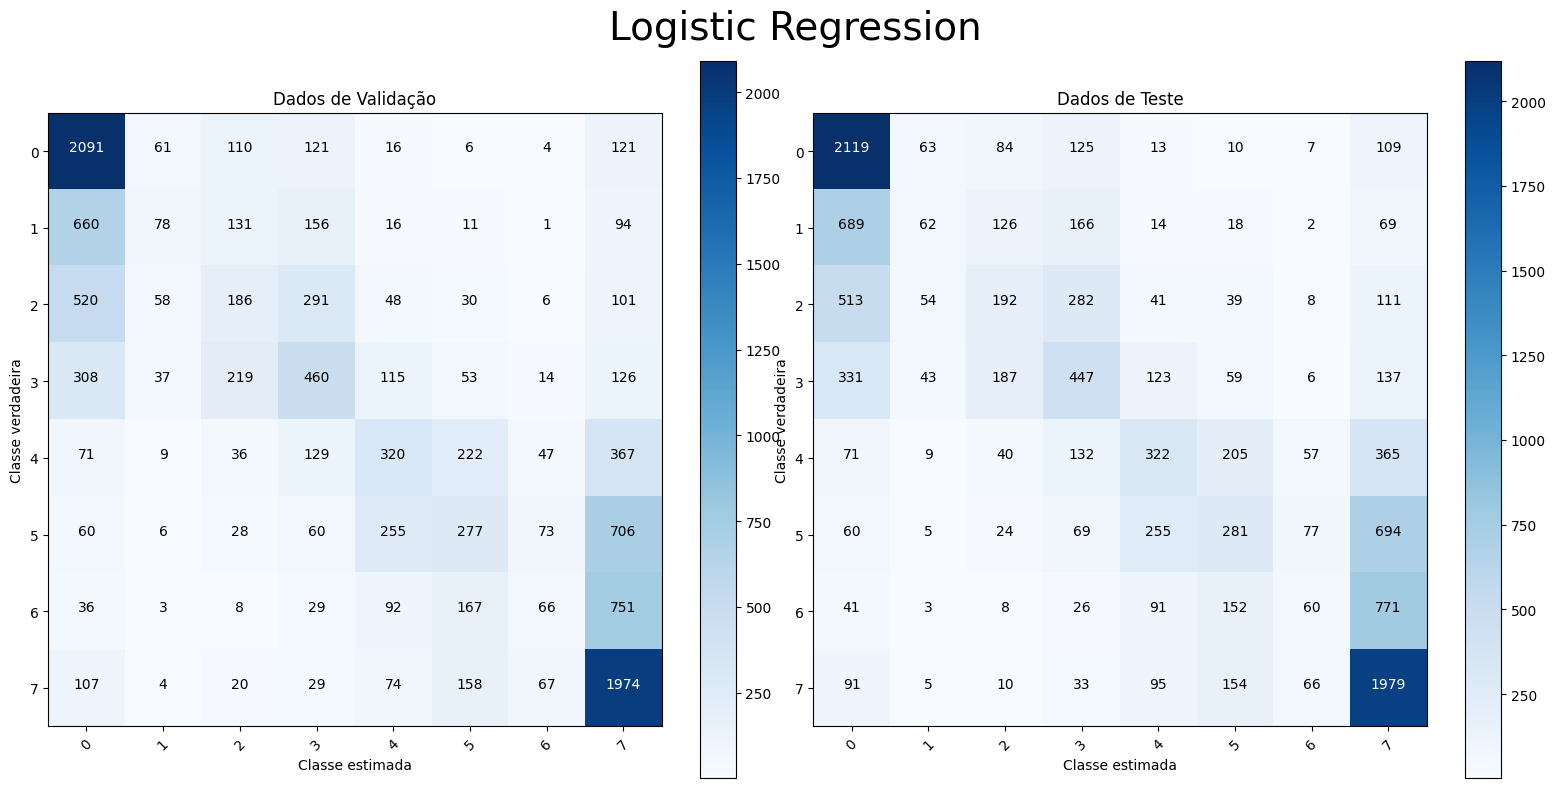

In [22]:
y2e_lr = multiClassify(X2_m, 'logReg', False, direct_lrMULTI)
y1v_lr = multiClassify(X1v_m, 'logReg', False, direct_lrMULTI)

print('Número de Erros Validação Logistic Regression: ', np.sum(y1v_m != y1v_lr))
print('Número de Erros Teste Logistic Regression: ', np.sum(y2_m != y2e_lr))

erros_v.append(np.sum(y1v_m != y1v_lr))
erros_t.append(np.sum(y2_m != y2e_lr))

MC = confusion_matrix(y2_m, y2e_lr)
MCV = confusion_matrix(y1v_m, y1v_lr)

plot_CM(MC,MCV,"Logistic Regression")

Número de Erros Validação Linear SVC:  7151
Número de Erros Teste Linear SVC:  7140


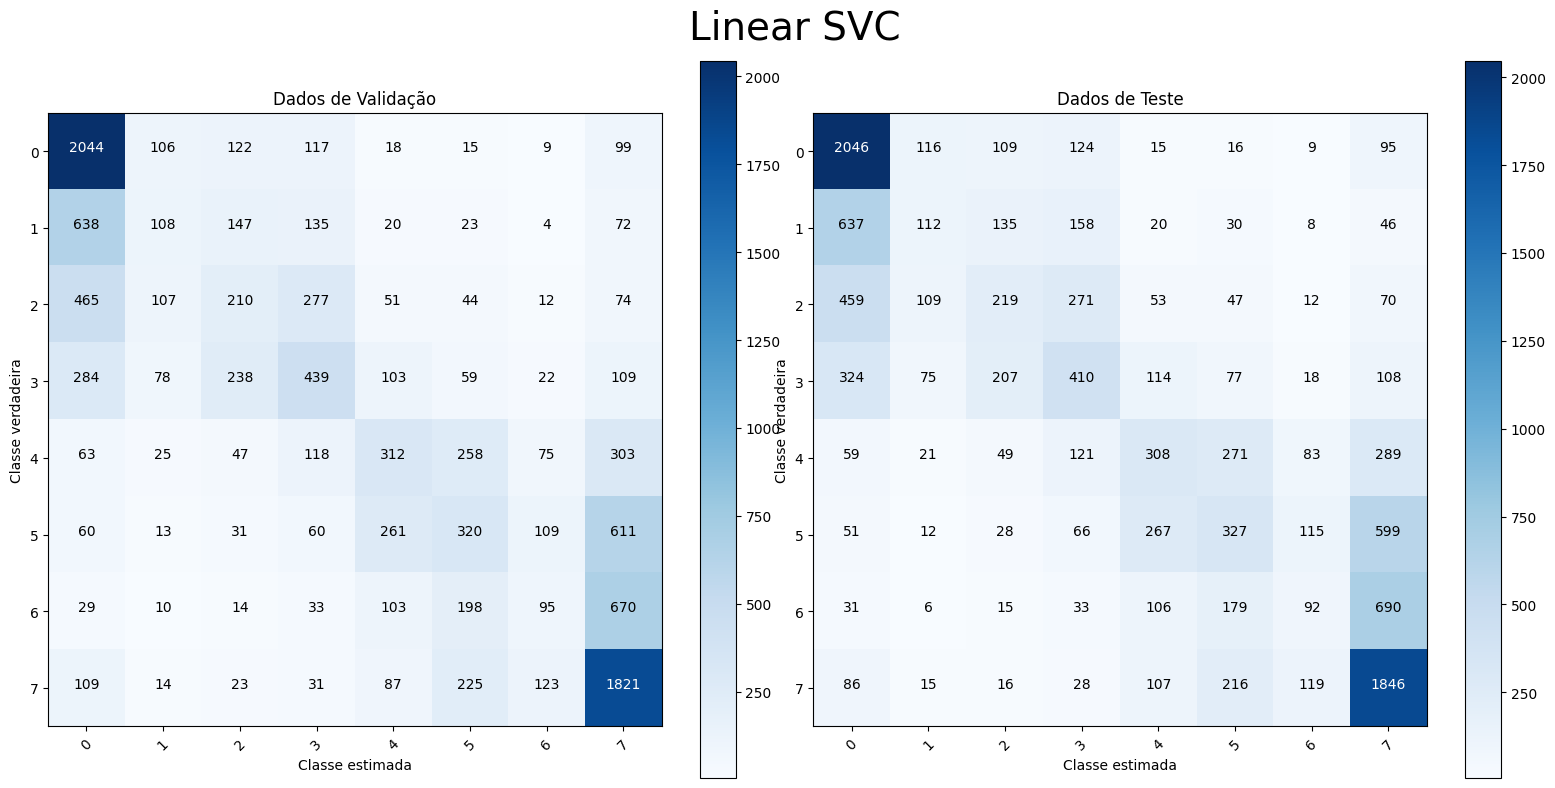

In [23]:
y2e_lsvc = multiClassify(X2_m, 'SVC', False, direct_lsvcMULTI)
y1v_lsvc = multiClassify(X1v_m, 'SVC', False, direct_lsvcMULTI)

print('Número de Erros Validação Linear SVC: ', np.sum(y1v_m != y1v_lsvc))
print('Número de Erros Teste Linear SVC: ', np.sum(y2_m != y2e_lsvc))

erros_v.append(np.sum(y1v_m != y1v_lsvc))
erros_t.append(np.sum(y2_m != y2e_lsvc))

MC = confusion_matrix(y2_m, y2e_lsvc)
MCV = confusion_matrix(y1v_m, y1v_lsvc)

plot_CM(MC,MCV,"Linear SVC")

Número de Erros Validação K_Neighbours:  8111
Número de Erros Teste K_Neighbours:  8109


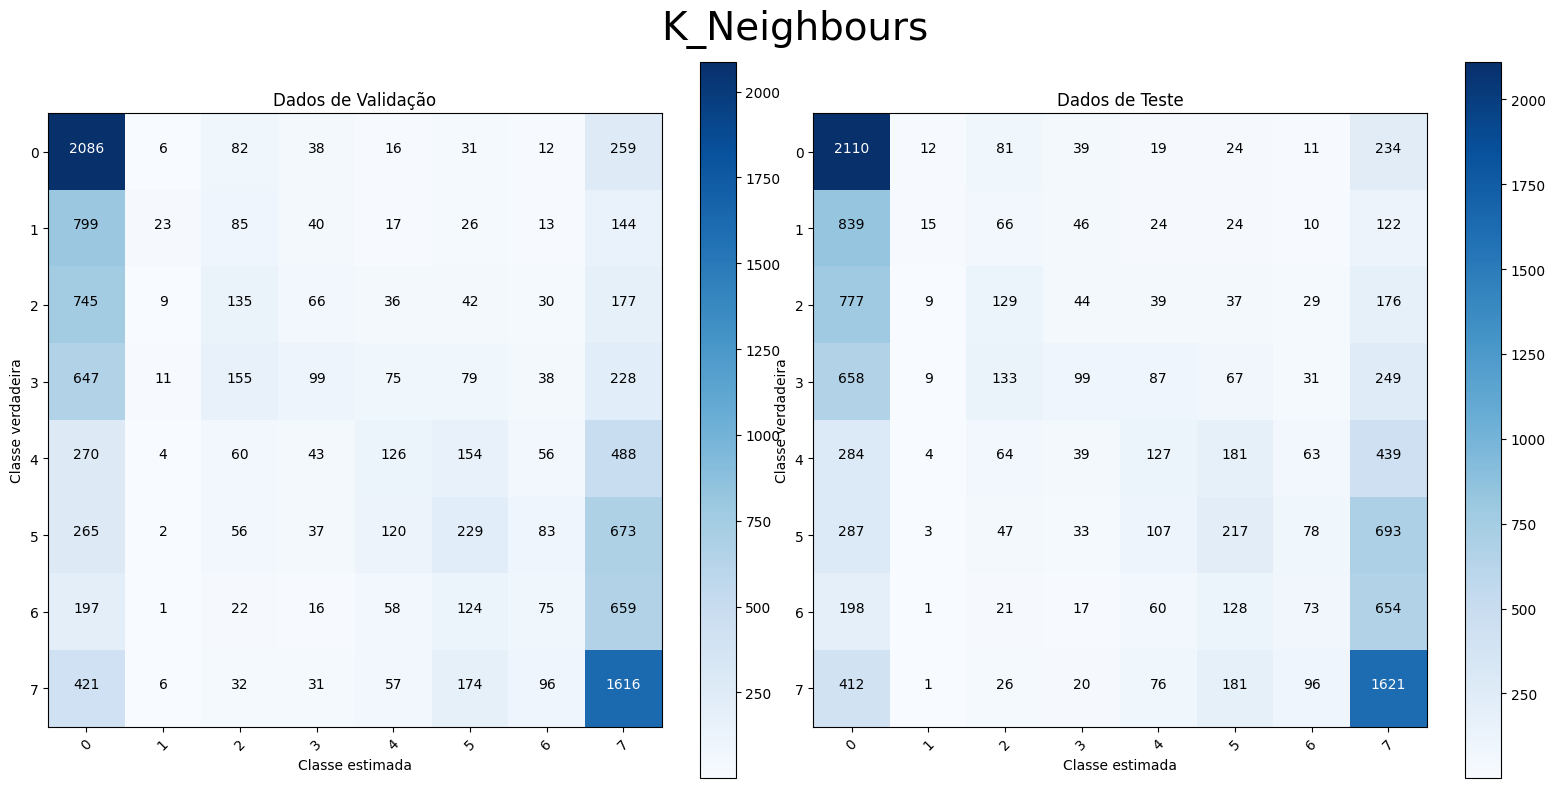

In [24]:
y2e_knn = multiClassify(X2_m, 'knn', False, direct_knnMULTI)
y1v_knn = multiClassify(X1v_m, 'knn', False, direct_knnMULTI)

print('Número de Erros Validação K_Neighbours: ', np.sum(y1v_m != y1v_knn))
print('Número de Erros Teste K_Neighbours: ', np.sum(y2_m != y2e_knn))

erros_v.append(np.sum(y1v_m != y1v_knn))
erros_t.append(np.sum(y2_m != y2e_knn))

MC = confusion_matrix(y2_m, y2e_knn)
MCV = confusion_matrix(y1v_m, y1v_knn)

plot_CM(MC,MCV,"K_Neighbours")

Número de Erros Validação Random Forest Classifier:  7815
Número de Erros Teste Random Forest Classifier:  7827


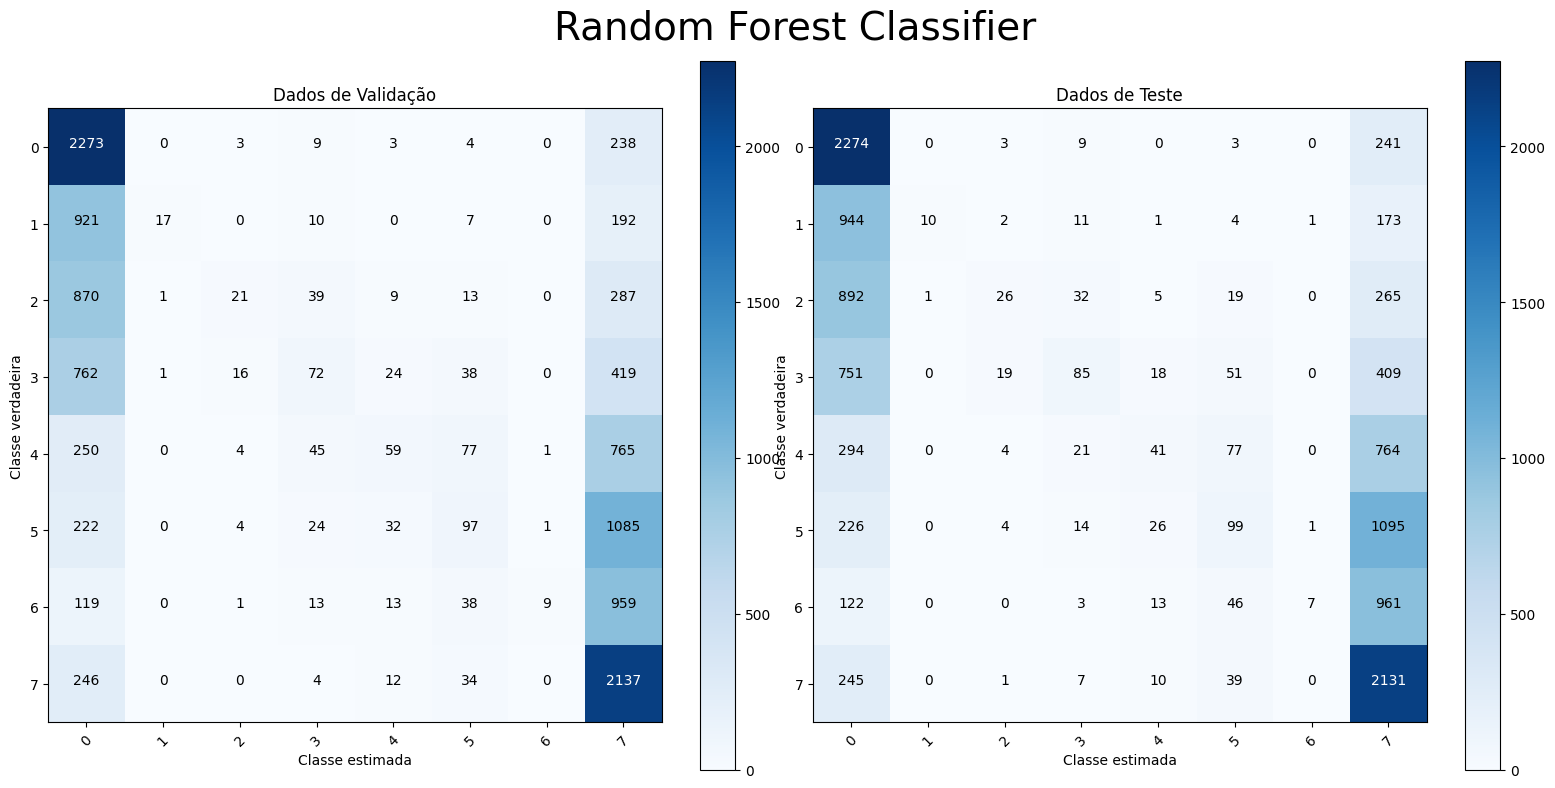

In [25]:
y2e_rfc = multiClassify(X2_m, 'trees', False, direct_rfcMULTI)
y1v_rfc = multiClassify(X1v_m, 'trees', False, direct_rfcMULTI)

print('Número de Erros Validação Random Forest Classifier: ', np.sum(y1v_m != y1v_rfc))
print('Número de Erros Teste Random Forest Classifier: ', np.sum(y2_m != y2e_rfc))

erros_v.append(np.sum(y1v_m != y1v_rfc))
erros_t.append(np.sum(y2_m != y2e_rfc))

MC = confusion_matrix(y2_m, y2e_rfc)
MCV = confusion_matrix(y1v_m, y1v_rfc)

plot_CM(MC,MCV,"Random Forest Classifier")

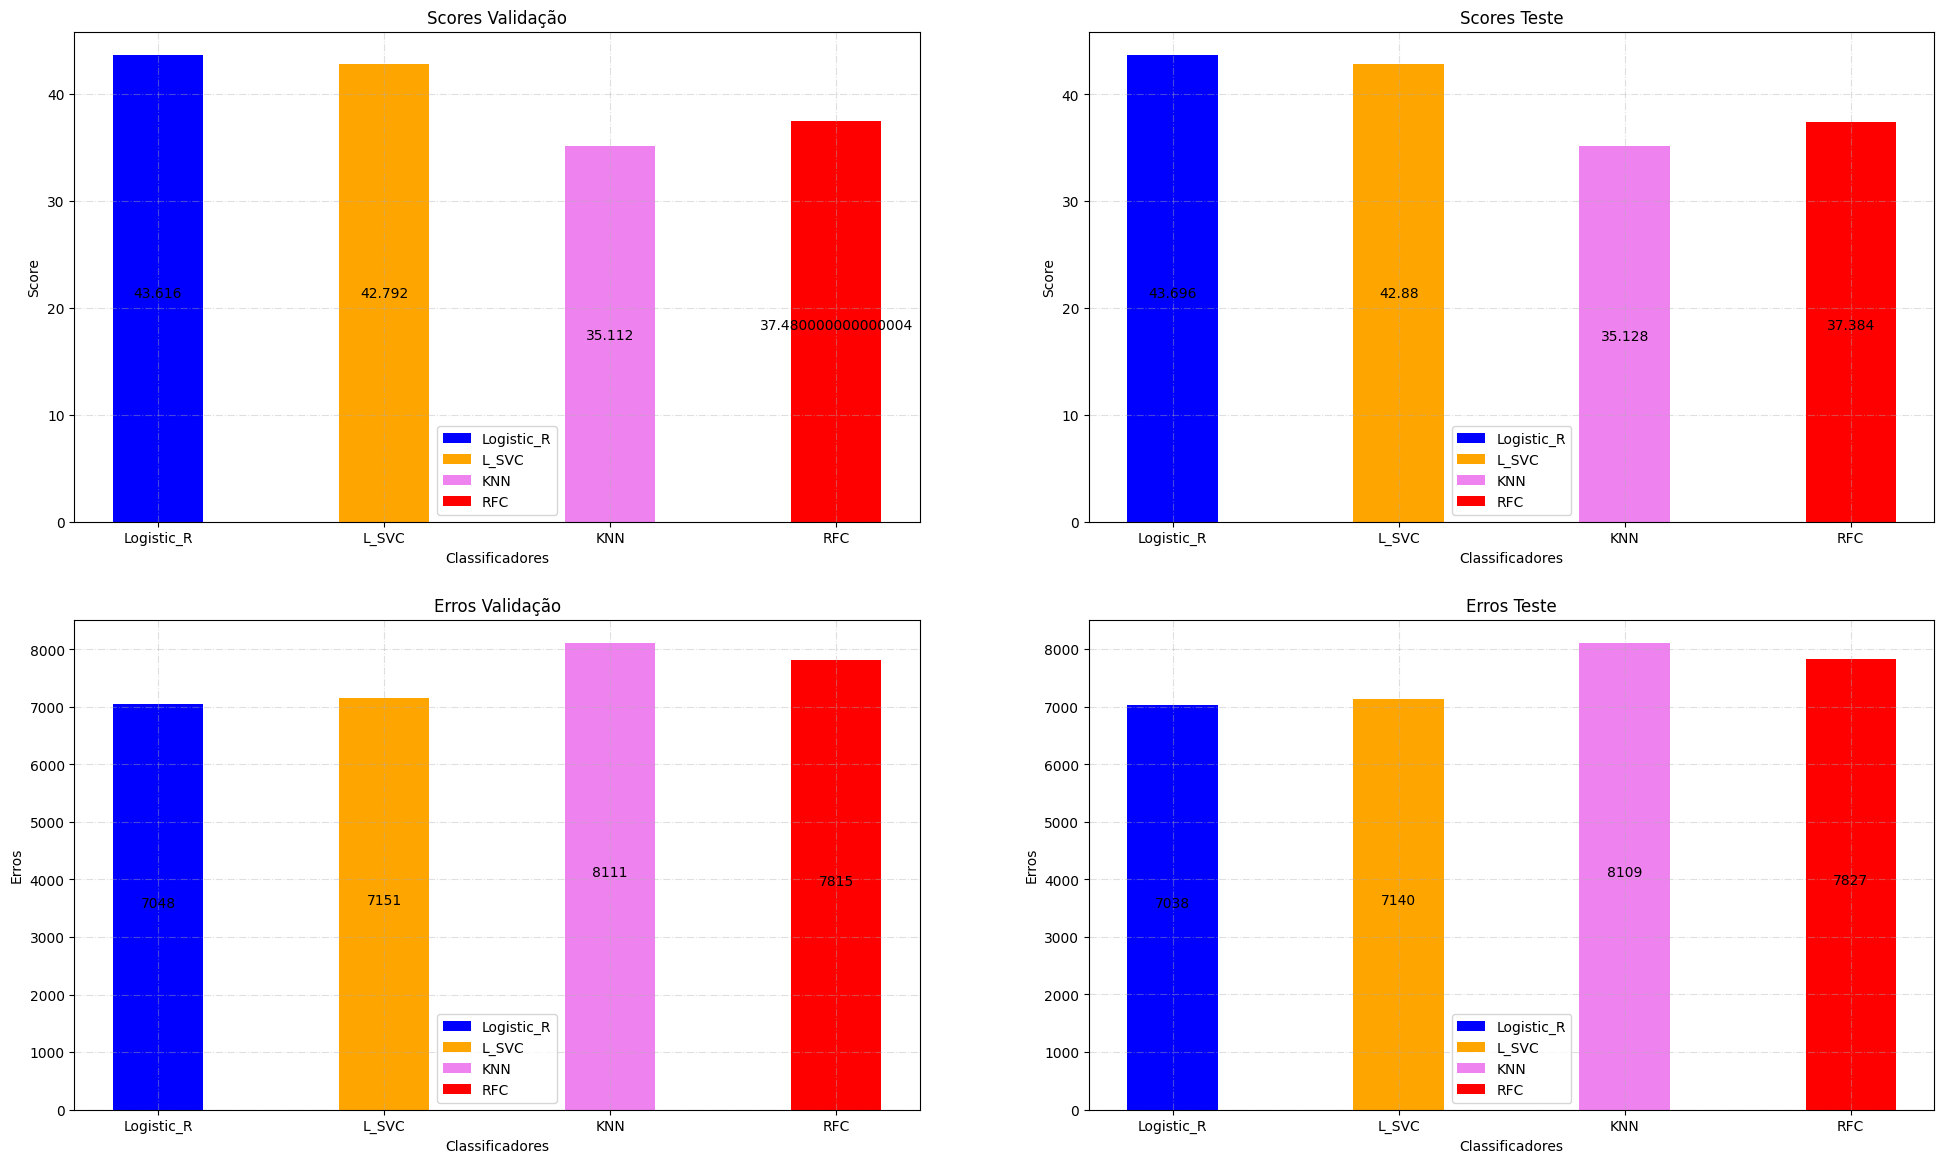

In [26]:
graphs()

<center>

| Classificador | Parâmetros | Score Treino (%) | Score Val. (%) | Score Teste (%) | Erros Val. | Erros Teste |
| --- | --- | --- | --- | --- | --- | --- |
| **Logistic Regression** | p = l2, C = 2 | 87.64 | 43.62 | 43.69 | 7048 | 7038 |
| **Linear SVC** | p = l2, C = 0.5 | 98.70 | 42.79 | 42.88 | 7151 | 7140 |
| **K-Neighbors Classifier** | k = 57, w=distance | 99.99 | 35.11 | 35.13 | 8111 | 8109 |
| **Random Forest Classifier** | components=150 | 99.99 | 37.48 | 37.38 | 7815 | 7827 |

</center>


### <center> PCA TruncatedSVD, Binário </center>

In [27]:
Docs1_b, Docs2_b, y1_b, y2_b     = train_test_split(Docs, yB, test_size=1/4, stratify=yB, random_state=42)
Docs1t_b, Docs1v_b, y1t_b, y1v_b = train_test_split(Docs1_b, y1_b, test_size=1/3, stratify=y1_b, random_state=42) 

#melhores parametros no binario
best_pars_b = [(5),              #min_df
             (r'\b\w\w+\b'),   #token
             ((1,2)),          #ngram
             ('l2'),           #penalty
             (4.5)]            #C   
              

X1t_b = tfidf_b.transform(Docs1t_b)
X1v_b = tfidf_b.transform(Docs1v_b)
X2_b  = tfidf_b.transform(Docs2_b)

#PCA truncatedSVD
svd = TruncatedSVD(n_components=500, n_iter=5)
svd.fit(X1t_b)

X1t_SVD_b = svd.transform(X1t_b)
X1v_SVD_b = svd.transform(X1v_b)
X2_SVD_b  = svd.transform(X2_b)


# Regressão Logística
lr_bin = LogisticRegression(penalty=best_pars_b[3], solver='liblinear', C=best_pars_b[4], max_iter=5000, tol=1e-2,random_state=42)
lr_bin.fit(X1t_b, y1t_b)

lr_PCA_bin = LogisticRegression(penalty=best_pars_b[3], solver='liblinear', C = best_pars_b[4], max_iter=5000, tol=1e-2,random_state=42)
lr_PCA_bin.fit(X1t_SVD_b, y1t_b)

LogisticRegression(C=4.5, max_iter=5000, random_state=42, solver='liblinear',
                   tol=0.01)

In [28]:
# Resultados
print('Avaliação final Sem PCA:')
print('Score Treino:    ', lr_bin.score(X1t_b, y1t_b)*100)
print('Score Validação: ', lr_bin.score(X1v_b, y1v_b)*100)
print('Score Teste:     ', lr_bin.score(X2_b, y2_b)*100,'\n')

# Resultados
print('Avaliação final com PCA:')
print('Score Treino:    ', lr_PCA_bin.score(X1t_SVD_b, y1t_b)*100)
print('Score Validação: ', lr_PCA_bin.score(X1v_SVD_b, y1v_b)*100)
print('Score Teste:     ', lr_PCA_bin.score(X2_SVD_b, y2_b)*100)

Avaliação final Sem PCA:
Score Treino:     98.86399999999999
Score Validação:  90.8
Score Teste:      90.928 

Avaliação final com PCA:
Score Treino:     89.77199999999999
Score Validação:  88.984
Score Teste:      89.032


### <center> PCA TruncatedSVD, Multiclasse </center>

In [29]:
Docs1_m, Docs2_m, y1_m, y2_m     = train_test_split(Docs, y, test_size=1/4, stratify=y,random_state=42)
Docs1t_m, Docs1v_m, y1t_m, y1v_m = train_test_split(Docs1_m, y1_m, test_size=1/3, stratify=y1_m,random_state=42) 


best_pars_m = [(5),              #min_df
             (r'\b\w\w\w+\b'),   #token
             ((1,2)),          #ngram
             ('l2'),           #penalty
             (2)]            #C    
              
X1t_m = tfidf_m.transform(Docs1t_m)
X1v_m = tfidf_m.transform(Docs1v_m)
X2_m  = tfidf_m.transform(Docs2_m)

#PCA truncatedSVD
svd = TruncatedSVD(n_components=500, n_iter=5)
svd.fit(X1t_m)
X1t_SVD_m = svd.transform(X1t_m)
X1v_SVD_m = svd.transform(X1v_m)
X2_SVD_m  = svd.transform(X2_m)

# Regressão Logística
lr_multi = LogisticRegression(penalty=best_pars_m[3], solver='saga', C=best_pars_m[4], max_iter=5000, tol=1e-2,random_state=42)
lr_multi.fit(X1t_m, y1t_m)

lr_PCA_multi = LogisticRegression(penalty=best_pars_m[3], solver='saga', C = best_pars_m[4], max_iter=5000, tol=1e-2,random_state=42)
lr_PCA_multi.fit(X1t_SVD_m, y1t_m)

LogisticRegression(C=1.5, max_iter=5000, random_state=42, solver='saga',
                   tol=0.01)

In [30]:
# Resultados
print('Avaliação final Sem PCA:')
print('Score Treino:    ', lr_multi.score(X1t_m, y1t_m)*100)
print('Score Validação: ', lr_multi.score(X1v_m, y1v_m)*100)
print('Score Teste:     ', lr_multi.score(X2_m, y2_m)*100,'\n')

# Resultados
print('Avaliação final com PCA:')
print('Score Treino:    ', lr_PCA_multi.score(X1t_SVD_m, y1t_m)*100)
print('Score Validação: ', lr_PCA_multi.score(X1v_SVD_m, y1v_m)*100)
print('Score Teste:     ', lr_PCA_multi.score(X2_SVD_m, y2_m)*100)

Avaliação final Sem PCA:
Score Treino:     87.64
Score Validação:  43.616
Score Teste:      43.696 

Avaliação final com PCA:
Score Treino:     46.836
Score Validação:  42.92
Score Teste:      43.112


### <center> Clustering </center>

In [57]:
dados_path = 'Dados/imdbFull.p'

In [58]:
D = openFile(dados_path)
Docs = D['data']
y = D['target']

Docs = clearText(Docs)

In [59]:
clustering_path = 'Resultados/clustering.p'

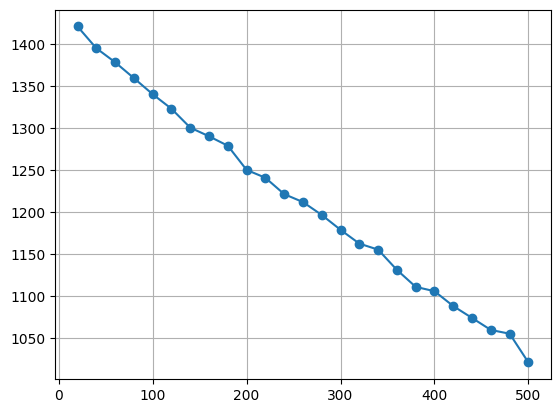

In [60]:
sse = pickle.load(open(clustering_path, 'rb'))['sse']

plt.plot(np.arange(20, 501, 20),sse, marker='o')
plt.grid(True)

In [61]:
Docs1, Docs2, y1, y2     = train_test_split(Docs, y, test_size=len(Docs)-5000, stratify=y,random_state=42)
Docs1t, Docs1v, y1t, y1v = train_test_split(Docs1, y1, test_size=len(Docs1)-3500, stratify=y1,random_state=42) 


tfidf  = TfidfVectorizer(min_df = 5, max_df = 0.95, max_features = 8000, stop_words = 'english').fit(Docs1)

X1t = tfidf.transform(Docs1t)
X1v  = tfidf.transform(Docs1v)

In [62]:
clusters = MiniBatchKMeans(n_clusters=400, init_size=1024, batch_size=2048,random_state=510).fit_predict(X1v)
tfidf  = tfidf.get_feature_names_out()
n_palavras = 10

In [63]:
df = pd.DataFrame(X1v.todense()).groupby(clusters).mean()
cluster = [115,249,136,386,135]
for i,l in df.iterrows():
        if i in cluster:
                print('Cluster ', i,' => ' , ','.join([tfidf[t] for t in np.argsort(l)[-n_palavras:]]))

Cluster  115  =>  spock,shatner,conveyed,star,episode,episodes,william,trek,vanishes,campbell
Cluster  135  =>  mobster,fiction,film,dialogue,movie,cool,pulp,travolta,shorty,russian
Cluster  136  =>  animation,cartoon,provide,movie,voices,kids,adventure,cgi,alvin,chipmunk
Cluster  249  =>  anti,allies,propaganda,partly,war,mission,vietnam,american,blood,rambo
Cluster  386  =>  point,heroism,human,film,convincing,reason,films,wwii,germans,war
